In [1]:
%matplotlib inline

import numpy
from matplotlib import pyplot
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", module="numpy")

date = '2016-12-14_19:10:34'

fname = '/mnt/storage/data/' + date + '/in/temperature/temperaturehistory'
col_names = ('dt','ms','ctrl',
             'bright','set','ctrl_output',
             'intensity','ttube','tsurf',
             'setv','setf','setq',
             'outv','outf','outq',
             'measv','measf','measq',
             'tamb','none')
col_dtypes = (datetime,int,bool,
              float,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float,float,float,
              float)

convertfunc = lambda s: float(s)*(1./1000.)
convertfunc_setv = lambda s: float(s)*(1./10.)
convertfunc_setf = lambda s: float(s)*(1./24.)
convertfunc_setq = lambda s: float(s)*(1./10.)

data = numpy.genfromtxt(fname,delimiter=',',skip_header=10,
                        dtype=col_dtypes,names=col_names,invalid_raise=False,
                        converters = {'ms': convertfunc, 
                                      'setv': convertfunc_setv, 
                                      'setf': convertfunc_setf,
                                      'setq': convertfunc_setq
                                     })
print(data[:3])

[ (b'2016-12-14_19:15:37', 1, False, 0.0, 0.0, 0.0, 0.0, 30.02, 29.58, 0.0, 0.8333333333333333, 0.15000000000000002, 1.98, 91.46, 15.67, 0.0, 48.0, 62.0, 21.0)
 (b'2016-12-14_19:15:37', 1, False, 0.0, 0.0, 0.0, 0.0, 30.02, 29.58, 0.0, 0.8333333333333333, 0.15000000000000002, 1.98, 91.46, 15.67, 0.0, 44.0, 62.0, 21.0)
 (b'2016-12-14_19:15:37', 1, False, 0.0, 0.0, 0.0, 0.0, 30.02, 29.2, 0.0, 0.8333333333333333, 0.15000000000000002, 1.98, 91.46, 15.67, 0.0, 45.0, 60.0, 21.0)]


/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


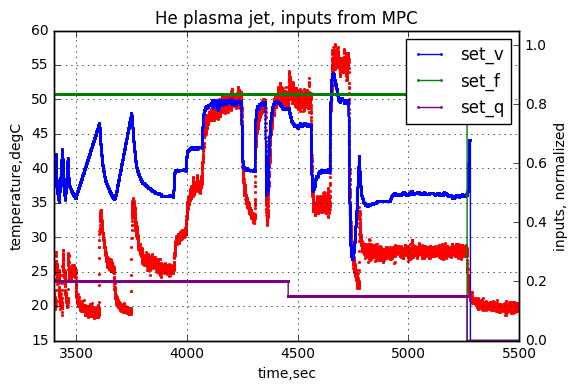

In [6]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['tsurf'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='temperature')

ax2 = ax.twinx()

ax2.plot(data['ms'],data['setv'],color='blue',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_v')
ax2.plot(data['ms'],data['setf'],color='green',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_f')
ax2.plot(data['ms'],data['setq'],color='purple',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_q')

# ax2.plot(data['ms'],data['intensity'],color='blue',
#         linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

ax.set_xlim([3400,5500])
#ax.set_ylim([0,30])
ax2.set_ylim([0,1.05])
ax.grid()
#ax.legend()
ax.set_ylabel('temperature,degC')
# ax2.set_ylabel('brightness,arb')
ax2.set_ylabel('inputs, normalized')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, inputs from MPC')
ax2.legend()

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()
fig.savefig(date + '-tsurf.png',dpi=300)

/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


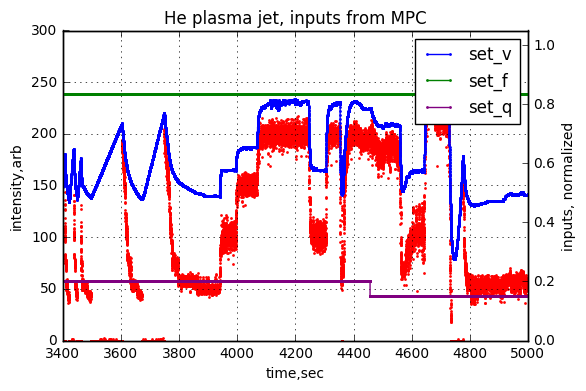

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['intensity'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='intensity')

ax2 = ax.twinx()

ax2.plot(data['ms'],data['setv'],color='blue',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_v')
ax2.plot(data['ms'],data['setf'],color='green',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_f')
ax2.plot(data['ms'],data['setq'],color='purple',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_q')

# ax2.plot(data['ms'],data['intensity'],color='blue',
#         linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

ax.set_xlim([3400,5000])
#ax.set_ylim([0,30])
ax2.set_ylim([0,1.05])
ax.grid()
#ax.legend()
#ax.set_ylabel('temperature,degC')
ax.set_ylabel('intensity,arb')
ax2.set_ylabel('inputs, normalized')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, inputs from MPC')
ax2.legend()

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()
fig.savefig(date + '-intensity.png',dpi=300)

/home/brandon/.virtualenvs/sci3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


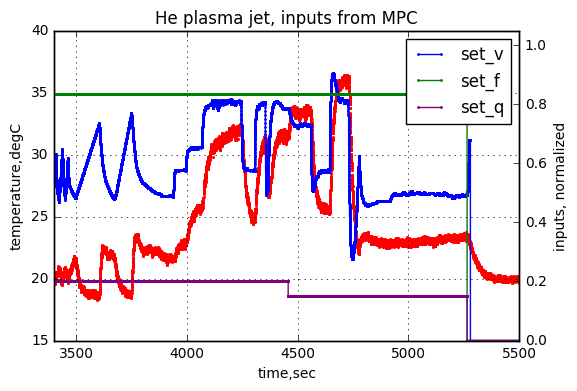

In [8]:
fig = pyplot.figure()
ax = fig.add_subplot('111')

ax.plot(data['ms'],data['ttube'],color='red',
        linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='temperature')

ax2 = ax.twinx()

ax2.plot(data['ms'],data['setv'],color='blue',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_v')
ax2.plot(data['ms'],data['setf'],color='green',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_f')
ax2.plot(data['ms'],data['setq'],color='purple',
        linestyle='-',marker='o',markeredgewidth=0,markersize=2,label='set_q')

# ax2.plot(data['ms'],data['intensity'],color='blue',
#         linestyle='None',marker='o',markeredgewidth=0,markersize=2,label='brightness')

ax.set_xlim([3400,5500])
#ax.set_ylim([0,30])
ax2.set_ylim([0,1.05])
ax.grid()
#ax.legend()
ax.set_ylabel('temperature,degC')
# ax2.set_ylabel('brightness,arb')
ax2.set_ylabel('inputs, normalized')
ax.set_xlabel('time,sec')
ax.set_title('He plasma jet, inputs from MPC')
ax2.legend()

#ax.axvline(93,0,250,color='black', linewidth=3, linestyle='--')
#ax.axvline(110,0,250,color='black', linewidth=3, linestyle='--')

fig.show()
fig.savefig(date + '-ttube.png',dpi=300)